In [1]:
import cv2
img_predict = cv2.imread('dataset/images/56.jpg') 

In [2]:
from ultralytics import YOLO
model = YOLO("runs/detect/train/weights/best.pt")

In [4]:
result = model.predict(source=img_predict, conf=0.5) # %50 altındaki güven skoruna sahip tahminleri dikkate alma.


0: 640x384 (no detections), 216.1ms
Speed: 11.1ms preprocess, 216.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 384)


In [5]:
result[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (4165, 2343)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))

In [9]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

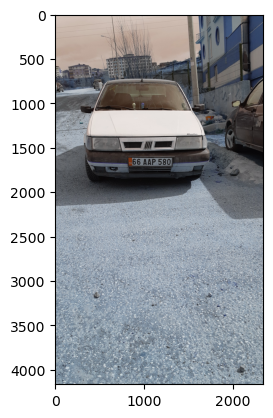

In [11]:
import matplotlib.pyplot as plt

img2 = img_predict.copy()

for box in result[0].boxes:
    x1, y1, x2, y2= map(int, box.xyxy[0])

    cv2.rectangle(img2, (x1,y1), (x2,y2), color=(0,255,0), thickness=5)

plt.imshow(img2)
plt.show()

In [13]:
!pip install easyocr

In [17]:
import easyocr
import matplotlib.pyplot as plt

In [19]:
img_predict = cv2.imread('dataset/images/56.jpg')
model = YOLO("runs/detect/train/weights/best.pt")
result = model.predict(source=img_predict, conf=0.5)
boxes = result[0].boxes
reader = easyocr.Reader(['en', 'tr'])

img2 = img_predict.copy()


0: 640x384 (no detections), 172.6ms
Speed: 8.5ms preprocess, 172.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 384)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [21]:
for box in boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    plate_roi = img_predict[y1:y2, x1:x2]
    ocr_result = reader.readtext(plate_roi)
    if ocr_result:
        detected_text = ocr_result[0][1]
        print("Plaka:", detected_text)
        cv2.rectangle(img2, (x1, y1), (x2, y2), color=(0, 255, 0), thickness=5)
        cv2.putText(img2, detected_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

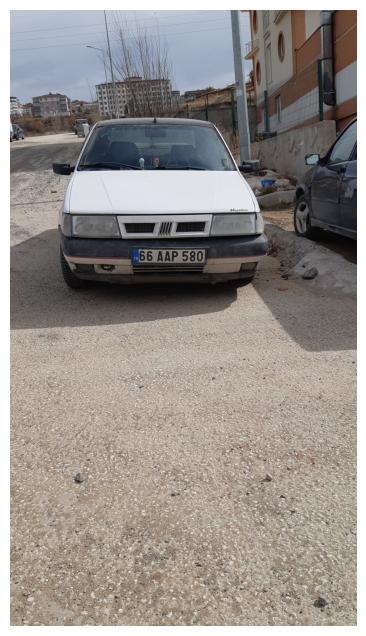

In [23]:
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()